In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as  mpl
import cartopy.mpl.ticker as cticker

In [2]:
path='/groups/XDU5/CMIP6_PMIP4/CESM2/piControl/'
file='merged.nc'

In [3]:
ds = xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:    (time: 3600, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) object 0001-01-15 13:00:00 ... 0300-12-15 12:00:00
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.10 (https://mp...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ISMIP6
    branch_method:          no parent
    ...                     ...
    tracking_id:            hdl:21.14100/5b4f3620-4efa-4fc4-a257-421bd31448b9
    variable_id:            tos
    variant_info:           CMIP6 ISMIP6 CESM2 piControl-withism experiment w...
    variant_label:          r1i1p1f1
    history:                Sun Sep 08 20:46:50 2024: cdo mergetime tos_Omon_...
    CDO:                    Climate Data Operators version 1.9.10 (https://mp...

In [4]:
ds_climo = ds.groupby('time.month').mean()#dim='time')
ds_climo

<xarray.Dataset>
Dimensions:   (lon: 360, month: 12, bnds: 2, lat: 180)
Coordinates:
  * lon       (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (month, lon, bnds) float64 0.0 1.0 1.0 2.0 ... 359.0 359.0 360.0
    lat_bnds  (month, lat, bnds) float64 -90.0 -89.0 -89.0 ... 89.0 89.0 90.0
    tos       (month, lat, lon) float32 nan nan nan nan ... -1.793 -1.793 -1.793

In [5]:
ds_climo.tos[11,1,1]

<xarray.DataArray 'tos' ()>
array(nan, dtype=float32)
Coordinates:
    lon      float64 1.5
    lat      float64 -88.5
    month    int64 12

Text(0.5, 0.91, 'SST Climatology from CESM2')

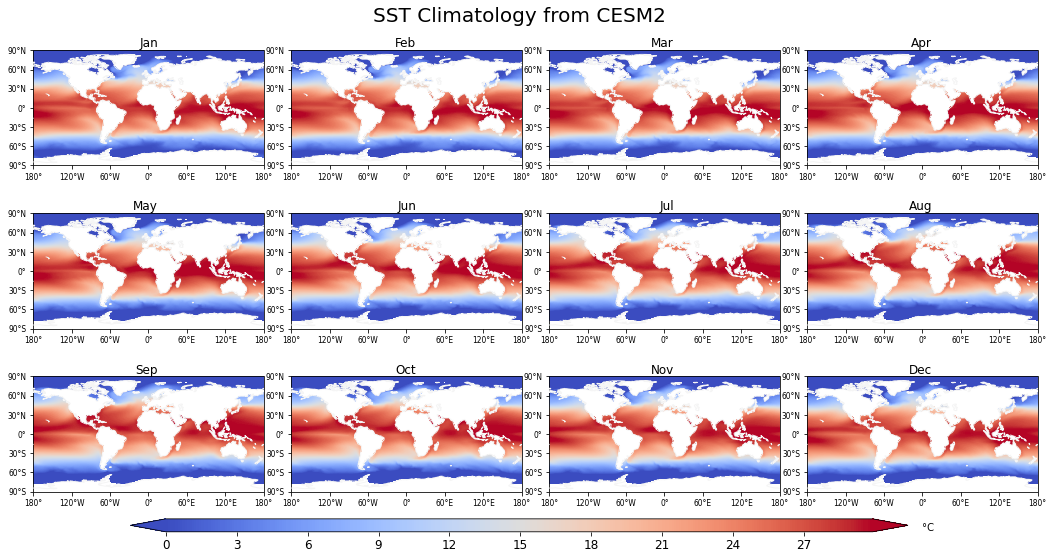

In [7]:
#12 months plot

ncols, nrows = 4,3
month=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
clevs = np.arange(0, 30, 0.1)

fig, axes = plt.subplots(nrows, ncols, figsize=(18,9), subplot_kw={'projection':ccrs.PlateCarree()}) 
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.12, hspace=0)
for i in range(nrows): #first set rows, next for each row, set columns
    for j in range(ncols):
        cs=axes[i,j].contourf(ds_climo.lon, ds_climo.lat, ds_climo.tos[i*4+j,:,:], 
                               cmap='coolwarm', extend='both', levels=clevs) 
        axes[i,j].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axes[i,j].xaxis.set_major_formatter(lon_formatter)
        axes[i,j].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axes[i,j].yaxis.set_major_formatter(lat_formatter)
        axes[i,j].tick_params(axis='both', labelsize=7.5)
        axes[i,j].coastlines(zorder=3, color='whitesmoke')
        axes[i,j].text(15,95,month[i*4+j], fontsize=12, horizontalalignment='right')
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.02])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label=None)
cbar.ax.tick_params(labelsize=12) 
cbar_ax.text(1.07,0.1,"\u00b0C", transform=cbar.ax.transAxes)
#cbar.set_label(label='\u00bC', loc='right')#, 'center')
plt.suptitle('SST Climatology from CESM2',fontsize=20, y=0.91)

In [52]:
ncols, nrows = 4,3
for i in range(nrows): #first set rows, next for each row, set columns
    for j in range(ncols):
        print(ds_climo.tos[i*4+j,100,100].values)

26.452785
26.26374
27.38344
28.972298
30.195055
30.29138
30.093441
29.677418
29.296894
29.107426
28.852757
27.741428
